In [8]:
import gc

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
run pygadget

In [12]:
run pygadget_utils

In [13]:
run rockstar

In [14]:
# parameters

# base halo
#base_basedir = "/run/media/lbignone/Seagate Expansion Drive/lbignone/simulations/lgzoom/out512/"
base_basedir = "/media/Seagate Expansion Drive/lbignone/simulations/lgzoom/out512/"
base_snap_number = 14
base_hid = 228540
base_fname = base_basedir + "snapshot_{:03d}".format(base_snap_number)

# ics
#ics_fname = "/run/media/lbignone/Seagate Expansion Drive/lbignone/simulations/lgzoom/ics_gadget_512base.dat"
ics_fname = "/media/Seagate Expansion Drive/lbignone/simulations/lgzoom/ics_gadget_512base.dat"

# load base halo
base_halos = rockstar_load(base_basedir, base_snap_number)
base_halo = base_halos.loc[base_hid]

# extracted box lenght
R = 5 * base_halo.Rvir / 1000.0
print(R)
dx = {"x": R, "y":R, "z":R}

# output file name
fout = "R{:d}_5RvirBox_Ellipsoid.dat".format(base_hid)

1.44033


In [15]:
base_halo

ID              2.285400e+05
DescID         -1.000000e+00
Mvir            2.877000e+12
Vmax            2.356500e+02
Vrms            2.376600e+02
Rvir            2.880660e+02
Rs              3.855400e+01
Np              3.330100e+04
x               3.564206e+01
y               3.871817e+01
z               2.977349e+01
VX              1.677500e+02
VY              6.110000e+01
VZ              7.504000e+01
JX             -1.425000e+13
JY              1.681000e+12
JZ              1.244000e+13
Spin            7.847000e-02
rs_klypin       3.813490e+01
Mvir_all        2.880800e+12
M200b           3.096100e+12
M200c           2.487800e+12
M500c           1.794600e+12
M2500c          8.472800e+11
Xoff            8.146040e+00
Voff            8.370000e+00
spin_bullock    7.820000e-02
b_to_a          6.012700e-01
c_to_a          5.511900e-01
A[x]            6.578210e+00
A[y]           -1.261118e+01
A[z]            1.345270e+01
b_to_a(500c)    5.270000e-01
PID            -1.000000e+00
Name: 228540.0

In [16]:
snap = Simulation(base_fname, multiple_files=True)
box_size = snap.box_size / 1000.0 # Box size en Mpc h^-1
print(snap)
print("box_size: {:f} Mpc h^-1".format(box_size))

file: /media/Seagate Expansion Drive/lbignone/simulations/lgzoom/out512/snapshot_014.0
file number: 8
endianess: <
particle numbers: {'buldge': 0, 'gas': 0, 'bndry': 0, 'stars': 0, 'disk': 0, 'halo': 15793246}
particle mass: {'buldge': 0.0, 'gas': 0.0, 'bndry': 0.0, 'stars': 0.0, 'disk': 0.0, 'halo': 0.008206117572030054}
cosmic time: 1.0
redshift: 2.22044604925e-16
box size: 50000.0
omega_matter: 0.3175
omega_lambda: 0.6825
h: 0.6711
flags: {'endt': False, 'feedback': 0, 'pot': False, 'sfr': 0, 'accel': False, 'metals': 0, 'stellar_age': 0, 'cooling': 0, 'entr_ics': 0, 'tstp': False}
box_size: 50.000000 Mpc h^-1


In [17]:
# load ics
snap0 = Simulation(ics_fname, multiple_files=False)
print(snap0)

file: /media/Seagate Expansion Drive/lbignone/simulations/lgzoom/ics_gadget_512base.dat
file number: 1
endianess: <
particle numbers: {'buldge': 0, 'gas': 0, 'bndry': 0, 'stars': 0, 'disk': 0, 'halo': 134217728}
particle mass: {'buldge': 0.0, 'gas': 0.0, 'bndry': 0.0, 'stars': 0.0, 'disk': 0.0, 'halo': 0.008206117572030054}
cosmic time: 0.016393442623
redshift: 60.0
box size: 50000.0
omega_matter: 0.3175
omega_lambda: 0.6825
h: 0.6711
flags: {'endt': False, 'feedback': 0, 'pot': False, 'sfr': 0, 'accel': False, 'metals': 0, 'stellar_age': 0, 'cooling': 0, 'entr_ics': 0, 'tstp': False}


In [18]:
# read block pos
pos = snap.read_block("pos", "halo", iter_files=True)

In [19]:
# set region limits
limits = []
for key in ["x", "y", "z"]:
    limits.append(base_halo[key] - dx[key])
    limits.append(base_halo[key] + dx[key])
    
limits

[34.201729999999998,
 37.082390000000004,
 37.277839999999998,
 40.158500000000004,
 28.333159999999999,
 31.213819999999998]

686

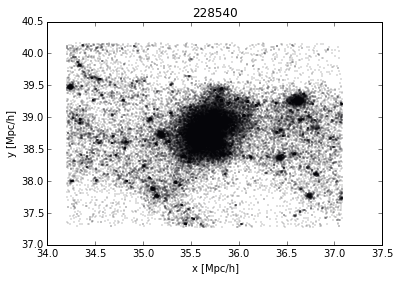

In [20]:
# get filtered region
for i, p in enumerate(pos):
    p = p/1000.0
    if i == 0:
        posf = filter_by_region(p, *limits)
    else:
        posf1 = filter_by_region(p, *limits)
        posf = pd.concat([posf, posf1], axis=0)

ids = posf.index
# plot region
plt.scatter(posf.x, posf.y, s=0.1, marker='.')

plt.xlabel("x [Mpc/h]")
plt.ylabel("y [Mpc/h]")
plt.title("{:d}".format(base_hid))

plt.savefig("R{:d}_region.png".format(base_hid))

gc.collect()

In [21]:
# read block pos ics
pos0 = snap0.read_block("pos", "halo") / 1000.0

index = pos0.index
sorter = index.argsort()

# filter ics to region
#pos0 = pos0.iloc[ids]
pos0 = filter_bloc_by_ids(pos0, ids, sorter)

gc.collect()

3345

In [22]:
center, extent = compute_bounding_box(pos0, box_lengh=50.0)

KeyError: 0

In [ ]:
center/box_size

In [ ]:
extent/box_size

In [23]:
pos0 = pos0/box_size

In [24]:
pos0.to_csv(fout, sep=" ", header=False, index=False)

In [ ]:
pos0 = 0
gc.collect()